In [85]:
# Lab Assignment 03
# The objective of this lab assignment is to build and evaluate classification models to predict
# customer churn given information from customers of a telephone company (data_lab_03.csv).

In [86]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

In [87]:
# load the dataset and display the first five rows
data = pd.read_csv('data_lab_03.csv')
data.head()

,Account length,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [88]:
# TASK 01: partition the dataset into 
# training set: 75% of the data
# test set: 25% of the data
# using sklearn.model_selection.train_test_split
# HINT: use 75% of the data for training and 25% for testing and set parameter random_state to 0
x_train, x_test, y_train, y_test = train_test_split(data[['Account length', 'International plan', 'Voice mail plan', 'Number voice mail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']],\
                                                    data['Churn'], train_size=0.75, test_size=0.25, random_state=0)

In [89]:
# determine the dimensionality of the training set and test set
print([x_train.shape, x_test.shape])

[(2499, 17), (834, 17)]


In [90]:
# QUESTION 01: how many observations and how many features does the training set contain?
# ANSWER: 2499 observations, 17 features

In [91]:
# QUESTION 02: how many observations and how many features does the test set contain?
# ANSWER: 834 observations, 17 features

In [92]:
# TASK 02: standardize the training set and test set using sklearn.preprocessing.StandardScaler
# HINT: compute the mean and standard deviation using only the training set and then apply this
# transformation on the training set and test set
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [93]:
# TASK 03: build decision tree classifier to classify customers as churned/non-churned
# HINT: use sklearn.tree.DecisionTreeClassifier with entropy as the split criterion
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(x_train_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [94]:
# show the structure of decision tree classifier
print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1, 238,  4,  1.37790751e+00, 0.60293799, 2499, 2.499e+03)
 (  2, 199, 16,  1.47932553e+00, 0.4991475 , 2278, 2.278e+03)
 (  3, 186,  1,  1.39084876e+00, 0.37934172, 2105, 2.105e+03)
 (  4, 135,  6,  7.91448593e-01, 0.26832186, 1921, 1.921e+03)
 (  5,   6, 12, -1.40246248e+00, 0.1779243 , 1681, 1.681e+03)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,  124, 1.240e+02)
 (  7,   8, 10, -1.40125608e+00, 0.18885385, 1557, 1.557e+03)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    1, 1.000e+00)
 (  9,  26,  7, -6.43222094e-01, 0.18567934, 1556, 1.556e+03)
 ( 10,  25, 13,  3.73752005e-02, 0.09482908,  411, 4.110e+02)
 ( 11,  22, 13,  1.76009070e-03, 0.16417121,  207, 2.070e+02)
 ( 12,  17,  3,  1.93759680e+00, 0.11102003,  203, 2.030e+02)
 ( 13,  16,  0, -1.88109088e+00, 0.04741446,  190, 1.900e+02)
 ( 14,  15,  5, -1.34136140e+00, 0.72192809,    5, 5.000e+00)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    1, 1.000e+00)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    4, 4.000e+00)
 ( -1,  

283

In [95]:
# QUESTION 03: how many nodes are in the tree? Which variable was selected to split the root node of the tree?
# ANSWER: 283 nodes. Variable 4.

In [96]:
# QUESTION 04: what do you conclude from observing the structure of the tree?
# ANSWER: The root node had an entropy of 0.60293799 with 2499 original observations.

In [97]:
# TASK 04: predict class labels using decision tree classifier
y_pred = classifier.predict(x_test_scaled)

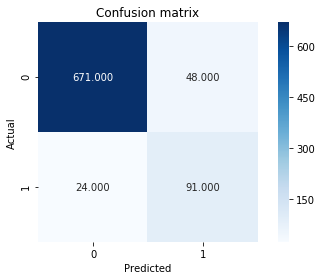

In [98]:
# TASK 05: plot confusion matrix for decision tree classifier
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [99]:
print(conf_matrix)

[[671  48]
 [ 24  91]]


In [100]:
# TASK 06: compute evaluation metrics for decision tree classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
#print([accuracy, error, precision, recall, F1_score])
print(accuracy)
print(error)
print(precision)
print(recall)
print(F1_score)

0.9136690647482014
0.08633093525179858
[0.96546763 0.65467626]
[0.93324061 0.79130435]
[0.94908062 0.71653543]


In [101]:
# QUESTION 05: what do you conclude about the performance of the decision tree classifier?
# ANSWER: The F1 score is the trade off between precision and recall. The score at [0.94908062 0.71653543] shows that
#          the decision tree classifier performed well with 91.4% accuracy.
#          Class 0 was predicted well, but class 1 had miscalculations.

In [102]:
# TASK 07: build k-Nearest Neighbors classifier to classify customers as churned/non-churned
# HINT: use sklearn.neighbors.KNeighborsClassifier with k = 3 (number of nearest neighbors)
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [103]:
# TASK 08: predict class labels using k-nearest neighbors classifier
y_pred = classifier.predict(x_test_scaled)

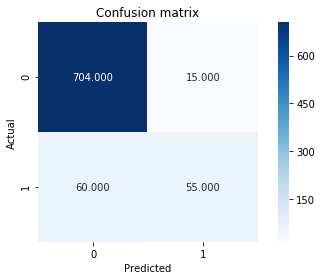

In [104]:
# TASK 09: plot confusion matrix for k-nearest neighbors classifier
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [105]:
# TASK 10: compute evaluation metrics for k-nearest neighbors classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
# print([accuracy, error, precision, recall, F1_score])
print(accuracy)
print(error)
print(precision)
print(recall)
print(F1_score)

0.9100719424460432
0.08992805755395683
[0.92146597 0.78571429]
[0.97913769 0.47826087]
[0.94942684 0.59459459]


In [106]:
# QUESTION 06: what do you conclude about the performance of the k-nearest neighbors classifier?
# ANSWER: Class 0 was predicted correctly, therefore the k-nearest neighbor classifier performed well with 91% accuracy.

In [107]:
# TASK 11: build Naive Bayes classifier to classify customers as churned/non-churned
# HINT: use sklearn.naive_bayes.GaussianNB
classifier = GaussianNB()
classifier.fit(x_train_scaled, y_train)

GaussianNB(priors=None)

In [108]:
# TASK 12: predict class labels using Naive Bayes classifier
y_pred = classifier.predict(x_test_scaled)

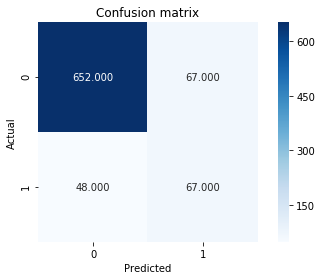

In [109]:
# TASK 13: plot confusion matrix for Naive Bayes classifier
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [110]:
# TASK 14: compute evaluation metrics for Naive Bayes classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
#print([accuracy, error, precision, recall, F1_score])
print(accuracy)
print(error)
print(precision)
print(recall)
print(F1_score)

0.8621103117505995
0.1378896882494005
[0.93142857 0.5       ]
[0.90681502 0.5826087 ]
[0.91895701 0.53815261]


In [111]:
# QUESTION 07: what do you conclude about the performance of the Naive Bayes classifier?
# ANSWER: The Naive Bayes Classifier performed okay, with an accuracy of 86%. K-Nearest Neighbors is better for this set

In [112]:
# TASK 15: build linear SVM classifier to classify customers as churned/non-churned
# HINT: use sklearn.svm.SVC with kernel = "linear" (no kernel)
classifier = SVC(kernel = 'linear')
classifier.fit(x_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [113]:
# determine the complexity of linear SVM classifier by computing the percentage of support vectors
len(classifier.support_vectors_)/len(x_train_scaled)

0.4237695078031212

In [114]:
# QUESTION 08: what do you conclude about the complexity of the linear SVM classifier?
# ANSWER: We are using around 42% of our training observations as super vectors.
#         It's a good value but a pretty high value still, so I would say we are slightly overfitting, but not too much

In [115]:
# TASK 16: predict class labels using linear SVM classifier
y_pred = classifier.predict(x_test_scaled)

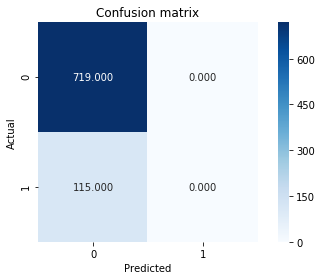

In [116]:
# TASK 17: plot confusion matrix for linear SVM classifier
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [117]:
# TASK 18: compute evaluation metrics for linear SVM classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
# print([accuracy, error, precision, recall, F1_score])
print(accuracy)
print(error)
print(precision)
print(recall)
print(F1_score)

0.8621103117505995
0.1378896882494005
[0.86211031 0.        ]
[1. 0.]
[0.92594977 0.        ]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [118]:
# QUESTION 09: what do you conclude about the performance of the linear SVM classifier?
# ANSWER: The Linear SVM performed well with little misclassification, but still had an accuracy at 86%.

In [119]:
# TASK 19: build kernel SVM classifier to classify customers as churned/non-churned
# HINT: use sklearn.svm.SVC with kernel = "rbf" (radial basis function kernel)
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
# determine the complexity of kernel SVM classifier by computing the percentage of support vectors
len(classifier.support_vectors_)/len(x_train_scaled)

0.304921968787515

In [121]:
# QUESTION 10: what do you conclude about the complexity of the kernel SVM classifier?
# ANSWER: We are using around 30% of our training observations as super vectors. This is better than our linear,
#         and performed well.

In [122]:
# TASK 20: predict class labels using kernel SVM classifier
y_pred = classifier.predict(x_test_scaled)

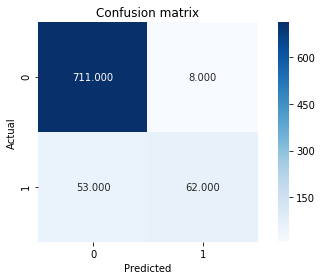

In [123]:
# TASK 21: plot confusion matrix for kernel SVM classifier
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [124]:
# TASK 22: compute evaluation metrics for kernel SVM classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
# print([accuracy, error, precision, recall, F1_score])
print(accuracy)
print(error)
print(precision)
print(recall)
print(F1_score)

0.9268585131894485
0.07314148681055155
[0.93062827 0.88571429]
[0.98887344 0.53913043]
[0.95886716 0.67027027]


In [125]:
# QUESTION 11: what do you conclude about the performance of the kernel SVM classifier?
# ANSWER: The RBF kernel SVM performed well with a 92.7% accuracy.

In [126]:
# QUESTION 12: which of the five classifiers had the best performance?
# ANSWER: The RBF kernel SVM classifier had the best performance.

In [127]:
# OPTIONAL: can you improve the results obtained by changing the parameters of the classifiers?